In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# ATTEMPT TO CORRELATE THE WINNING PARTY FOR EACH STATE IN ELECTION 2014 and 2019 along WITH TURNOUT %
# DOESN'T ACCOUNT FOR ALLIANCES - ONLY THE PARTY WINNING MOST SEATS

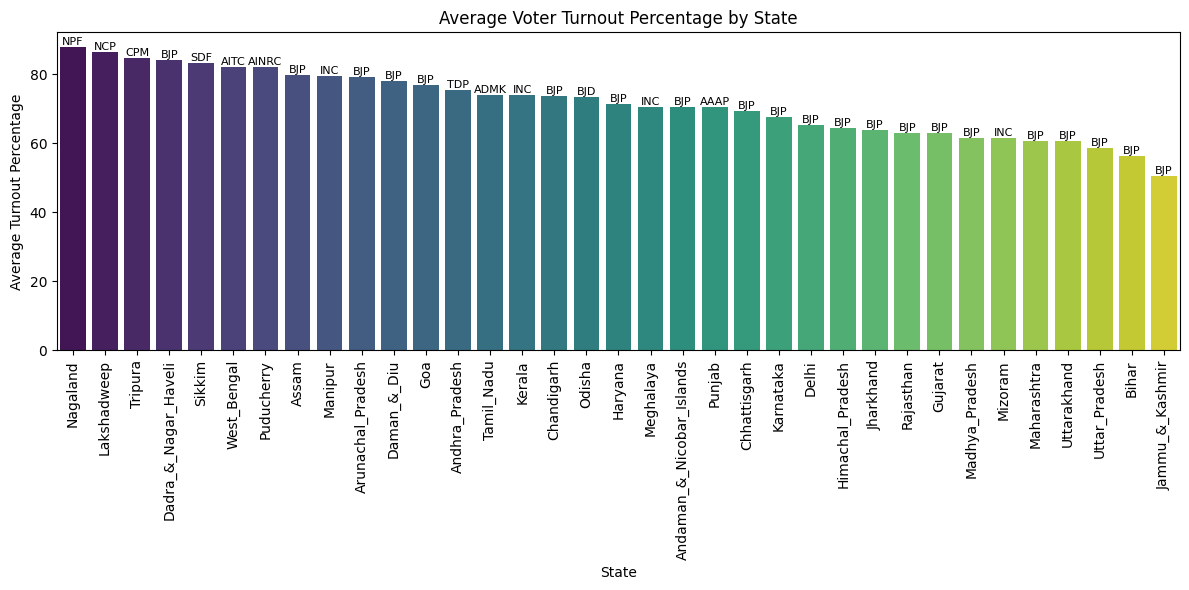

In [3]:
input_file = "Elections_2014_Winning_Candidates.csv"
winning_candidates_df = pd.read_csv(input_file)

average_turnout_by_state = winning_candidates_df.groupby('State_Name')['Turnout_Percentage'].mean()
# print(average_turnout_by_state)

average_turnout_by_state = average_turnout_by_state.sort_values(ascending=False)

# print(winning_candidates_df.groupby(['State_Name', 'Party'])['Votes'].count())
most_seats_by_state = winning_candidates_df.groupby(['State_Name', 'Party'])['Votes'].count().reset_index()
# print(most_seats_by_state)    
idx = most_seats_by_state.groupby(['State_Name'])['Votes'].transform(max) == most_seats_by_state['Votes']
# print(idx)
most_seats_by_state = most_seats_by_state[idx]
# print(most_seats_by_state)
# Sort states by average turnout percentage in descending order
average_turnout_by_state = average_turnout_by_state.sort_values(ascending=False)

# Plotting the average turnout percentage for each state
plt.figure(figsize=(12, 6))
sns.barplot(x=average_turnout_by_state.index, y=average_turnout_by_state.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Turnout Percentage')
plt.title('Average Voter Turnout Percentage by State')

# Adding annotations for the party that won most seats in each state
for index, value in enumerate(average_turnout_by_state.index):
    party = most_seats_by_state[most_seats_by_state['State_Name'] == value]['Party'].values[0]
    plt.text(index, average_turnout_by_state[value], party, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

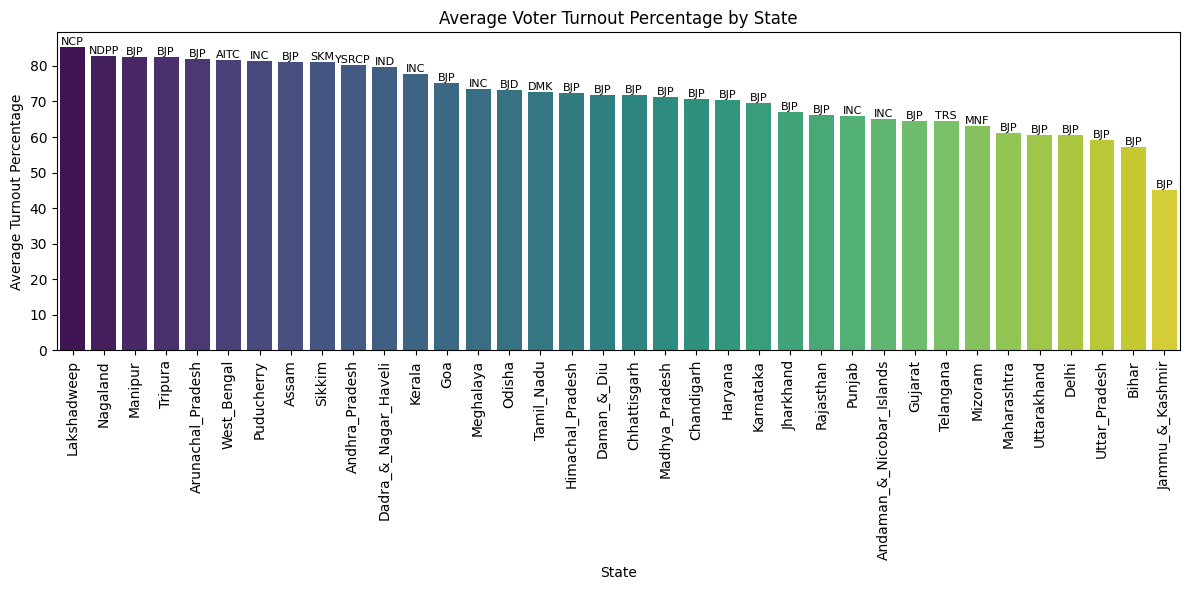

In [4]:
input_file = "Elections_2019_Winning_Candidates.csv"
winning_candidates_df = pd.read_csv(input_file)


average_turnout_by_state = winning_candidates_df.groupby('State_Name')['Turnout_Percentage'].mean()
# print(average_turnout_by_state)

average_turnout_by_state = average_turnout_by_state.sort_values(ascending=False)
# Get the party that won the most seats in each state
# print(winning_candidates_df.groupby(['State_Name', 'Party'])['Votes'].count())
most_seats_by_state = winning_candidates_df.groupby(['State_Name', 'Party'])['Votes'].count().reset_index()
# print(most_seats_by_state)    
idx = most_seats_by_state.groupby(['State_Name'])['Votes'].transform(max) == most_seats_by_state['Votes']
# print(idx)
most_seats_by_state = most_seats_by_state[idx]
# print(most_seats_by_state)
# Sort states by average turnout percentage in descending order
average_turnout_by_state = average_turnout_by_state.sort_values(ascending=False)

# Plotting the average turnout percentage for each state
plt.figure(figsize=(12, 6))
sns.barplot(x=average_turnout_by_state.index, y=average_turnout_by_state.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Turnout Percentage')
plt.title('Average Voter Turnout Percentage by State')

# Adding annotations for the party that won most seats in each state
for index, value in enumerate(average_turnout_by_state.index):
    party = most_seats_by_state[most_seats_by_state['State_Name'] == value]['Party'].values[0]
    plt.text(index, average_turnout_by_state[value], party, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [5]:
# BJP, a national party, dominates in states with lower voter turnouts, whereas regional parties dominate in states with higher voter turnouts